In [1]:
import warnings
warnings.filterwarnings("ignore")
def action_with_warnings():
    warnings.warn("should not appear")
with warnings.catch_warnings(record=True):
    action_with_warnings()
import os
import sys
import csv
import talib
from   scipy.stats       import norm
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import mplfinance        as mpf

In [2]:
usdjpy_df_ = pd.read_csv("./data/avatrade_mt5/klines/1m/USDJPY.csv", parse_dates=True, index_col="datetime")
eurusd_df_ = pd.read_csv("./data/avatrade_mt5/klines/1m/EURUSD.csv", parse_dates=True, index_col="datetime")

<Axes: >

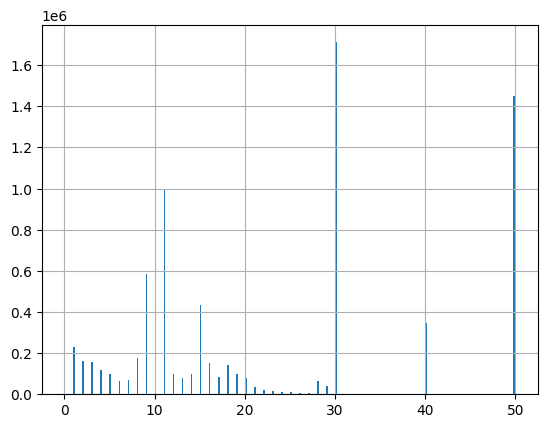

In [3]:
usdjpy_df_["2000-01-01":]['Spread'].hist(bins=250, range=(0, 50))

<Axes: >

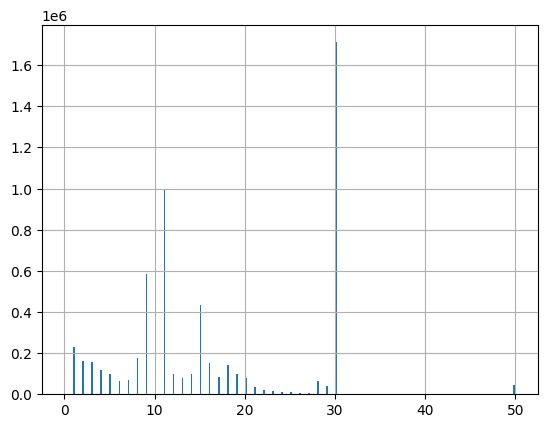

In [4]:
usdjpy_df_["2005-01-01":]['Spread'].hist(bins=250, range=(0, 50))

<Axes: >

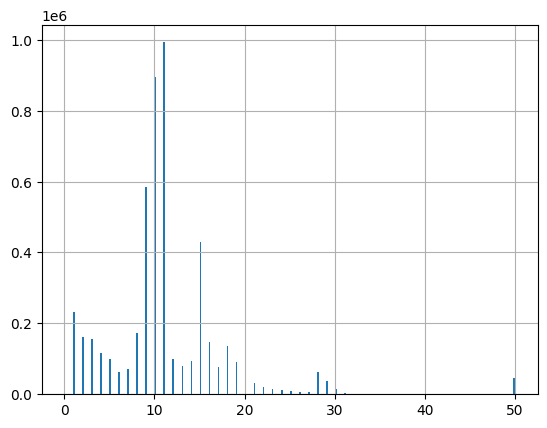

In [5]:
usdjpy_df_["2010-01-01":]['Spread'].hist(bins=250, range=(0, 50))

<Axes: >

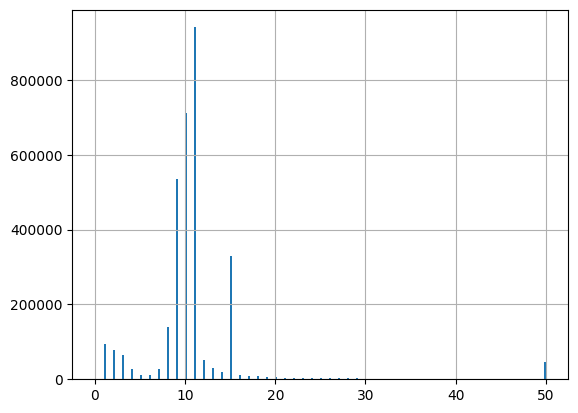

In [6]:
usdjpy_df_["2015-01-01":]['Spread'].hist(bins=250, range=(0, 50))

<Axes: >

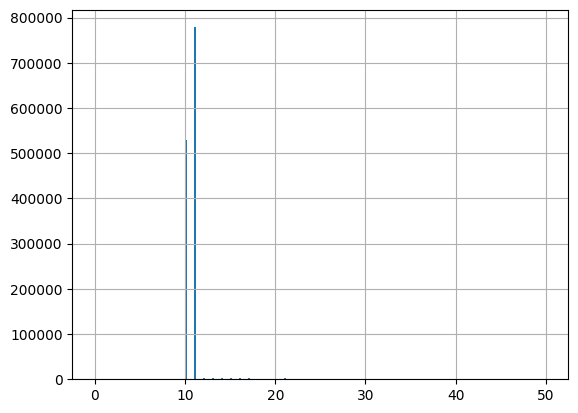

In [7]:
usdjpy_df_["2020-01-01":]['Spread'].hist(bins=250, range=(0, 50))

<Axes: >

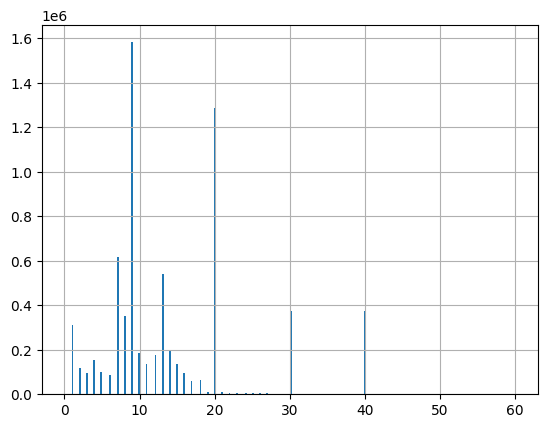

In [10]:
eurusd_df_["2000-01-01":]['Spread'].hist(bins=250, range=(0, 60))

<Axes: >

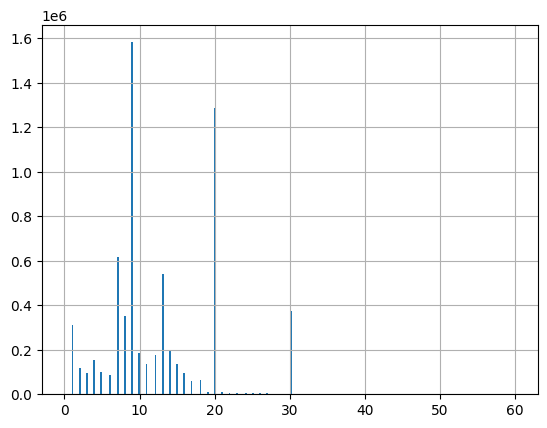

In [11]:
eurusd_df_["2005-01-01":]['Spread'].hist(bins=250, range=(0, 60))

<Axes: >

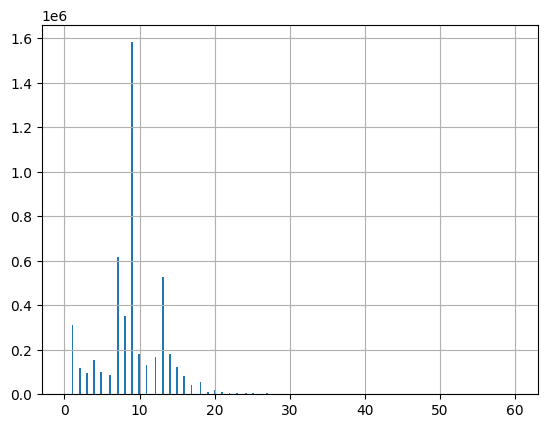

In [12]:
eurusd_df_["2010-01-01":]['Spread'].hist(bins=250, range=(0, 60))

<Axes: >

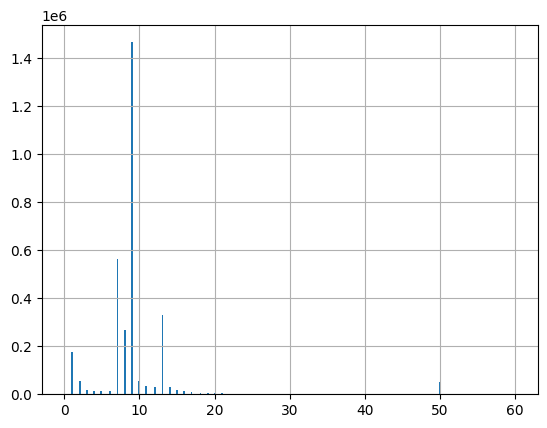

In [13]:
eurusd_df_["2015-01-01":]['Spread'].hist(bins=250, range=(0, 60))

<Axes: >

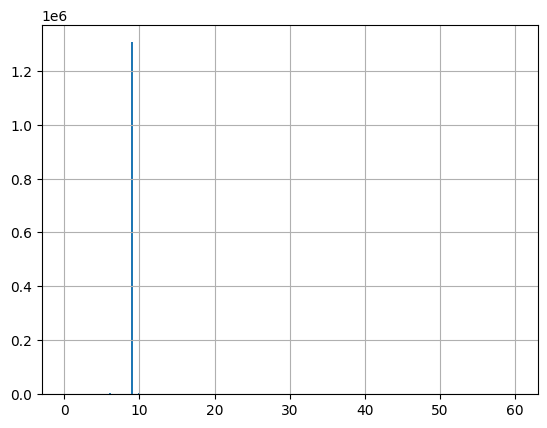

In [14]:
eurusd_df_["2020-01-01":]['Spread'].hist(bins=250, range=(0, 60))

In [15]:
# rolling averages of spreads
window = 4*60 # 4 hours rolling
usdjpy_df_['average_spread'] = usdjpy_df_['Spread'].rolling(window=window).mean()
eurusd_df_['average_spread'] = eurusd_df_['Spread'].rolling(window=window).mean()

In [16]:
timeframe_by_hours  = 4
timeframe_by_minute = timeframe_by_hours*60

In [17]:
timeframe = f"{timeframe_by_minute}Min"

usdjpy_df = usdjpy_df_.resample(timeframe).agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume': 'sum', 'average_spread':'last'})
eurusd_df = eurusd_df_.resample(timeframe).agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume': 'sum', 'average_spread':'last'})

usdjpy_df.rename(columns={"average_spread": "Spread"}, inplace=True)
eurusd_df.rename(columns={"average_spread": "Spread"}, inplace=True)

usdjpy_df.dropna(inplace=True) # Dropping because of FX doesn't trade during weekends
eurusd_df.dropna(inplace=True) # Dropping because of FX doesn't trade during weekends

In [18]:
usdjpy_df

,Open,High,Low,Close,Volume,Spread
datetime,,,,,,
2000-01-03 04:00:00+00:00,101.960,102.100,101.590,101.670,647,50.000000
2000-01-03 08:00:00+00:00,101.670,101.900,101.630,101.860,1067,50.000000
2000-01-03 12:00:00+00:00,101.870,101.890,101.390,101.410,1258,50.000000
2000-01-03 16:00:00+00:00,101.430,101.890,101.430,101.500,657,50.000000
2000-01-03 20:00:00+00:00,101.520,101.820,101.430,101.710,571,50.000000
...,...,...,...,...,...,...
2023-09-01 04:00:00+00:00,145.450,145.625,145.362,145.418,8691,10.000000
2023-09-01 08:00:00+00:00,145.418,145.510,145.205,145.228,7458,10.000000
2023-09-01 12:00:00+00:00,145.228,146.219,144.437,146.202,29850,10.008333


In [19]:
eurusd_df

,Open,High,Low,Close,Volume,Spread
datetime,,,,,,
2000-01-03 04:00:00+00:00,1.01710,1.01810,1.01340,1.01410,895,50.0
2000-01-03 08:00:00+00:00,1.01420,1.01420,1.00790,1.00850,1675,50.0
2000-01-03 12:00:00+00:00,1.00840,1.01620,1.00540,1.01530,1632,50.0
2000-01-03 16:00:00+00:00,1.01540,1.02780,1.01460,1.02750,1277,50.0
2000-01-03 20:00:00+00:00,1.02730,1.02760,1.02330,1.02370,432,50.0
...,...,...,...,...,...,...
2023-09-01 04:00:00+00:00,1.08414,1.08592,1.08281,1.08556,6811,9.0
2023-09-01 08:00:00+00:00,1.08556,1.08560,1.08327,1.08328,7884,9.0
2023-09-01 12:00:00+00:00,1.08328,1.08814,1.07860,1.07862,27843,9.0


<Axes: >

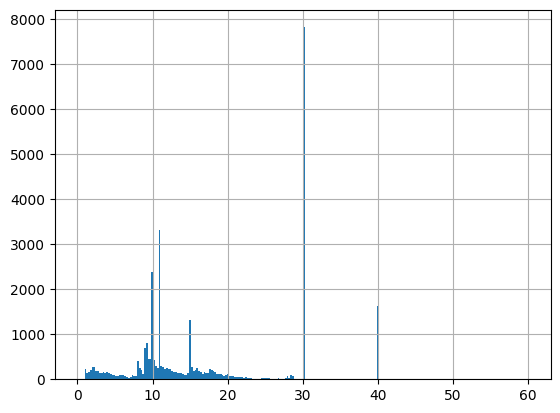

In [21]:
usdjpy_df["2000-01-01":]['Spread'].hist(bins=250, range=(0, 60))

<Axes: >

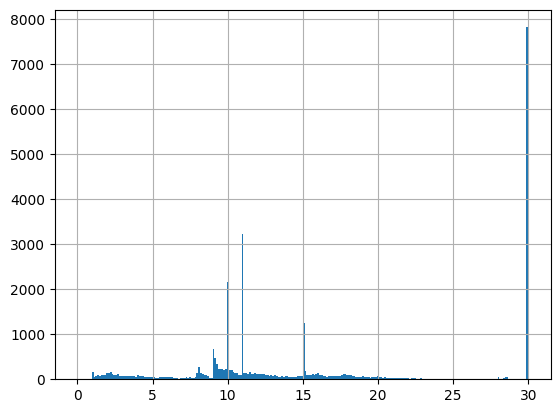

In [25]:
usdjpy_df["2005-01-01":]['Spread'].hist(bins=250, range=(0, 30))

<Axes: >

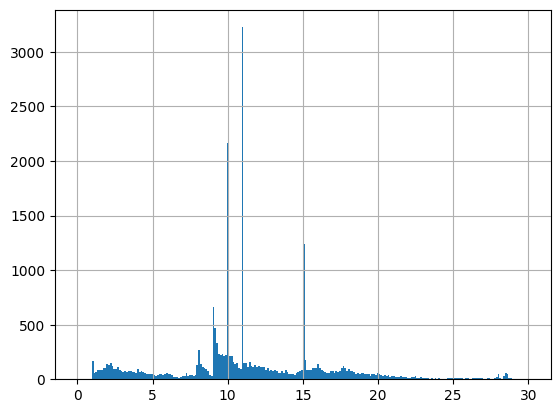

In [26]:
usdjpy_df["2010-01-01":]['Spread'].hist(bins=250, range=(0, 30))

<Axes: >

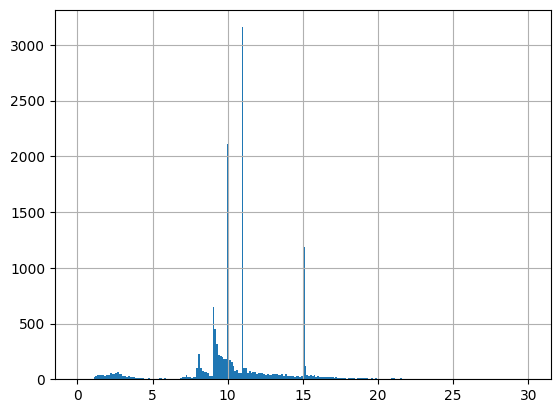

In [27]:
usdjpy_df["2015-01-01":]['Spread'].hist(bins=250, range=(0, 30))

<Axes: >

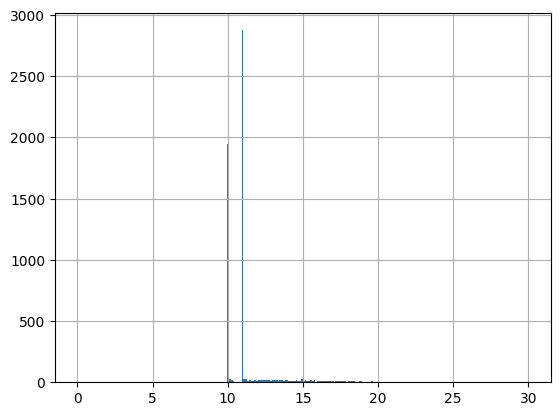

In [28]:
usdjpy_df["2020-01-01":]['Spread'].hist(bins=250, range=(0, 30))

<Axes: >

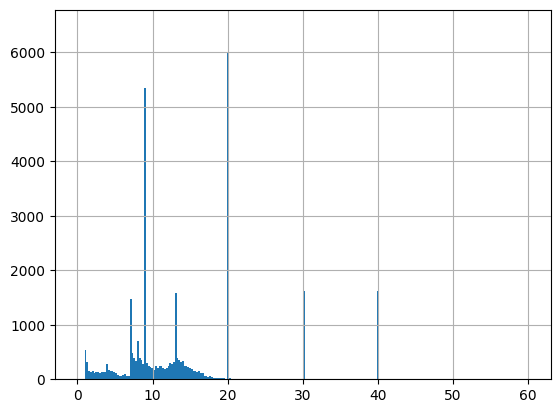

In [29]:
eurusd_df["2000-01-01":]['Spread'].hist(bins=250, range=(0, 60))

<Axes: >

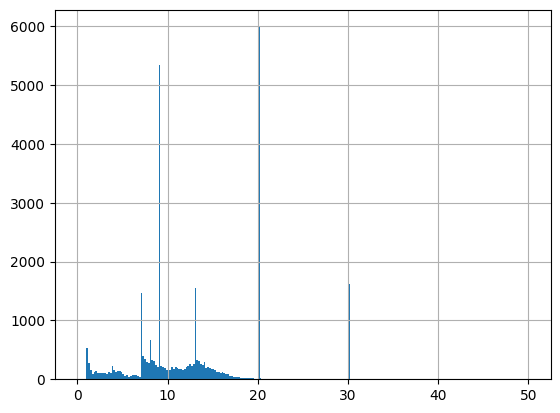

In [31]:
eurusd_df["2005-01-01":]['Spread'].hist(bins=250, range=(0, 50))

<Axes: >

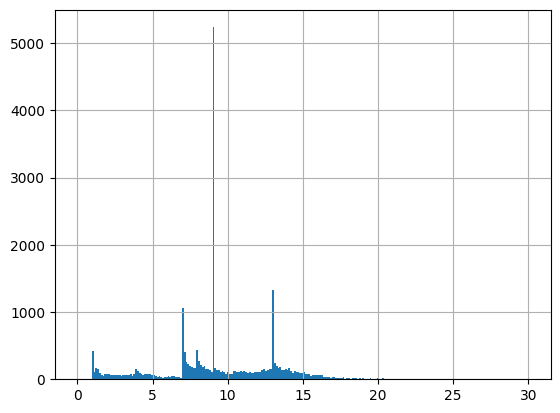

In [32]:
eurusd_df["2010-01-01":]['Spread'].hist(bins=250, range=(0, 30))

<Axes: >

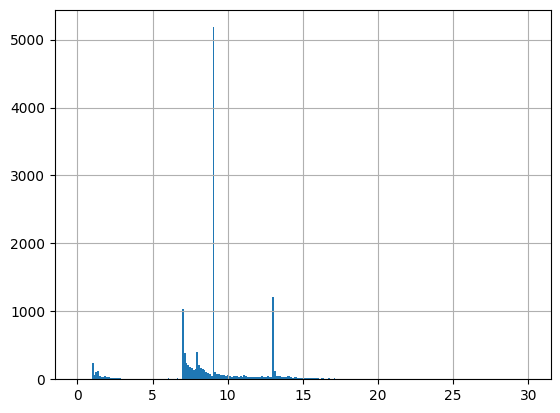

In [33]:
eurusd_df["2015-01-01":]['Spread'].hist(bins=250, range=(0, 30))

<Axes: >

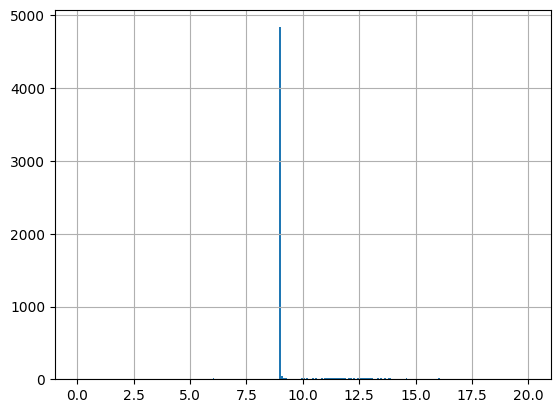

In [35]:
eurusd_df["2020-01-01":]['Spread'].hist(bins=250, range=(0, 20))

In [39]:
usdjpy_df["2010-01-01":]['Spread'].mean()

11.617631748357308

In [40]:
usdjpy_df["2015-01-01":]['Spread'].mean()

11.219642898999133

In [41]:
usdjpy_df["2020-01-01":]['Spread'].mean()

11.761356098931985

In [42]:
eurusd_df["2010-01-01":]['Spread'].mean()

9.742939326674065

In [43]:
eurusd_df["2015-01-01":]['Spread'].mean()

9.668638377162143

In [44]:
eurusd_df["2020-01-01":]['Spread'].mean()

9.874425238898256